# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1.

<center>

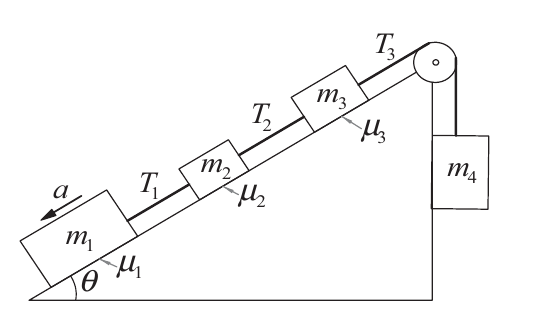

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [ ]:

import numpy as np


g = 9.81
theta = 45 * np.pi / 180


m1 = 10
m2 = 4
m3 = 5
m4 = 6

mu1 = 0.25
mu2 = 0.3
mu3 = 0.2


b1 = m1 * g * (np.sin(theta) - mu1 * np.cos(theta))
b2 = m2 * g * (np.sin(theta) - mu2 * np.cos(theta))
b3 = m3 * g * (np.sin(theta) - mu3 * np.cos(theta))
b4 = -m4 * g



lado_izq = b1 + b2 + b3
lado_der = m4
coef_a = m1 + m2 + m3 + m4

a = (lado_izq + b4) / coef_a



T1 = b1 - m1 * a
T2 = T1 - m2 * a + b2
T3 = T2 - m3 * a + b3


print("a  =", a, "m/s^2")
print("T1 =", T1, "N")
print("T2 =", T2, "N")
print("T3 =", T3, "N")


a  = 1.6134024234076976 m/s^2
T1 = 35.89135719172326 N
T2 = 48.86055656372456 N
T3 = 68.54041454044619 N


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

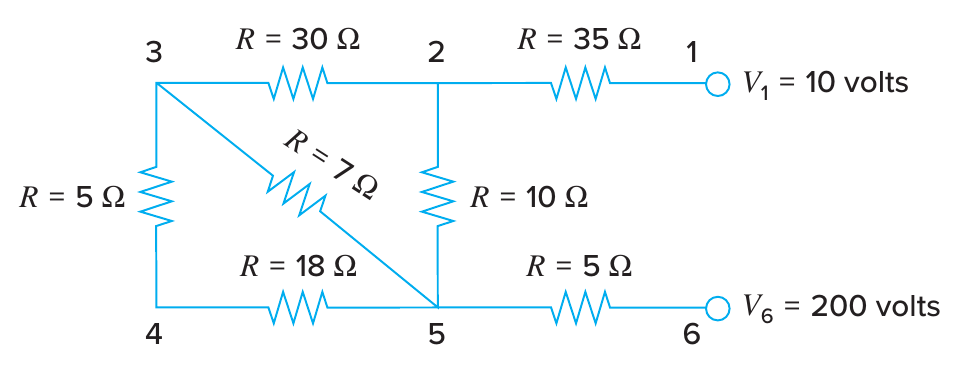


In [ ]:

import numpy as np



def resolver_corrientes():
    for i12 in np.arange(0, 10, 0.001):
        i23 = (10 - 28*i12) / 60
        izquierda_ec2 = 47*i12 - 7*i23


        if abs(izquierda_ec2 - 200) < 0.01:
            return i12, i23

    return None, None



i12, i23 = resolver_corrientes()


if i12 is not None:
    i25 = i12 - i23
    i34 = i23
    i45 = i34
    i56 = i12

    print("Solución encontrada:")
    print(f"i12 = {i12:.4f} A")
    print(f"i23 = {i23:.4f} A")
    print(f"i25 = {i25:.4f} A")
    print(f"i34 = {i34:.4f} A")
    print(f"i45 = {i45:.4f} A")
    print(f"i56 = {i56:.4f} A")
else:
    print(" No se encontró una solución en el rango probado.")


Solución encontrada:
i12 = 4.0020 A
i23 = -1.7009 A
i25 = 5.7029 A
i34 = -1.7009 A
i45 = -1.7009 A
i56 = 4.0020 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


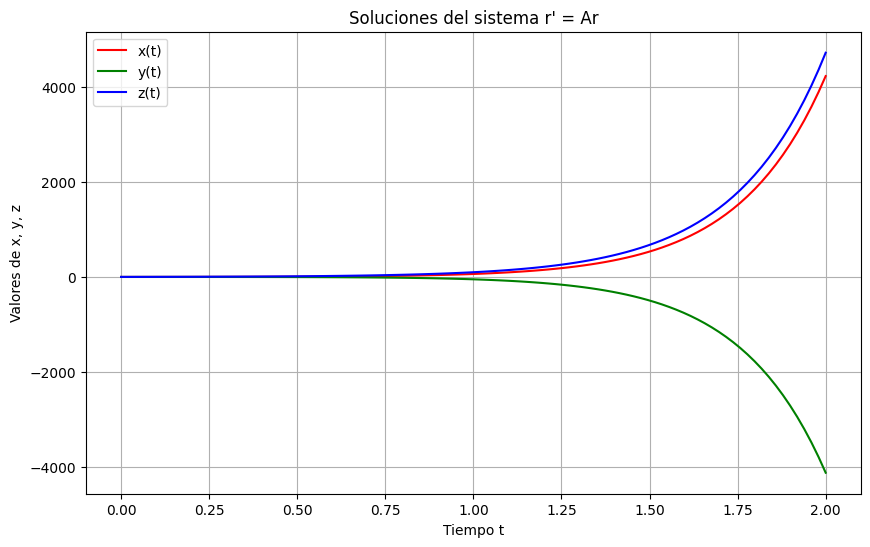

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])


r0 = np.array([1, 1, 2])

valores, vectores = np.linalg.eig(A)
D = np.diag(valores)
U = vectores
U_inv = np.linalg.inv(U)


t_list = np.linspace(0, 2, 100)


x_vals = []
y_vals = []
z_vals = []


for t in t_list:

    exp_Dt = np.diag(np.exp(valores * t))


    temp1 = np.dot(U, exp_Dt)
    exp_At = np.dot(temp1, U_inv)


    rt = np.dot(exp_At, r0)


    x_vals.append(rt[0])
    y_vals.append(rt[1])
    z_vals.append(rt[2])

plt.figure(figsize=(10, 6))
plt.plot(t_list, x_vals, label='x(t)', color='red')
plt.plot(t_list, y_vals, label='y(t)', color='green')
plt.plot(t_list, z_vals, label='z(t)', color='blue')

plt.title('Soluciones del sistema r\' = Ar')
plt.xlabel('Tiempo t')
plt.ylabel('Valores de x, y, z')
plt.legend()
plt.grid(True)
plt.show()


# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [ ]:

gamma = 2
hbar = 1
Bz = 1
Bx = 0
By = 0


factor = -gamma * hbar / 2


H = np.array([[Bz, Bx - 1j*By],
              [Bx + 1j*By, -Bz]])


H = factor * H


print("Hamiltoniano H:")
print(H)


H_conjugado_transpuesta = H.conj().T
es_hermitico = np.allclose(H, H_conjugado_transpuesta)
print("¿H es hermítico?:", es_hermitico)


valores, vectores = np.linalg.eig(H)

print("\nAutovalores (niveles de energía):")
print(valores)

print("\nAutovectores:")
print(vectores)


print("\nNormas de los autovectores:")
for i in range(2):
    norma = np.linalg.norm(vectores[:, i])
    print("Autovector", i+1, "tiene norma =", norma)


Hamiltoniano H:
[[-1.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j]]
¿H es hermítico?: True

Autovalores (niveles de energía):
[-1.+0.j  1.-0.j]

Autovectores:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Normas de los autovectores:
Autovector 1 tiene norma = 1.0
Autovector 2 tiene norma = 1.0


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

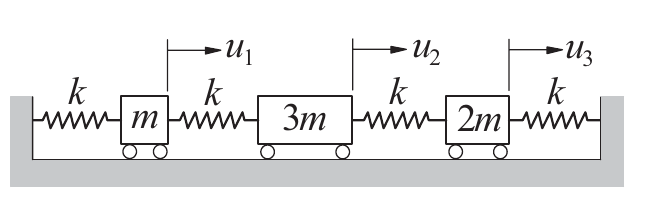
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [ ]:

K_base = np.array([[ 2, -1,  0],
                   [-1,  2, -1],
                   [ 0, -1,  1]])

M_base = np.diag([1, 3, 2])

from scipy.linalg import eigh


eigenvals, eigenvecs = eigh(K_base, M_base)


omega = np.sqrt(eigenvals)


print("Frecuencias naturales (en unidades de sqrt(k/m)):")
for i, w in enumerate(omega):
    print(f"ω{i+1} = {w:.4f}")

print("\nFormas modales (autovectores normalizados):")
print(eigenvecs)


Frecuencias naturales (en unidades de sqrt(k/m)):
ω1 = 0.2965
ω2 = 0.9226
ω3 = 1.4925

Formas modales (autovectores normalizados):
[[ 0.20973643 -0.31141518 -0.92683937]
 [ 0.40103645 -0.35776904  0.21096068]
 [ 0.48657986  0.50942346 -0.06105554]]
